<center>&copy; | Ghassen <strong>MARRAKCHI</strong> - 2023</center>

<table width="100%" border="0">
  <tr>    
  <td><img src="./_src/USPN.jpg"  alt="Sorbonne Paris Nord"                   align="left"   height="50px"/></td>
  <td><img src="./_src/LIPN.png"  alt="Laboratoire d'informatique Paris Nord" align="center" height="50px"/></td>
  <td><img src="./_src/ICUBE.png" alt="ICube"                                 align="right"  height="50px"/></td>
  <td><img src="./_src/CNES.png"  alt="Centre National des Etudes Spatiales"  align="right"  height="50px"/></td>
  </tr>
</table>
<hr>

<h1 style="text-align:center;color:#045cab"><center>Domain Invariant Representation Learning</center></h1>
<h2>
    <center>
        <strong>
            <font color='#3f4a4f'>Datasets Exploration</font>
        </strong>
    </center>
</h2>
<hr>

<h4><strong><font color='#353b38'>Outline</font></strong></h4>

<ol style="list-style-type: upper-roman;">
    <li><a href="./I-Introduction.ipynb">Introduction</a></li>
    <li><strong>UCR</strong></li>
    <li><a href="./III-CORPS.ipynb">CORPS</a></li>
</ol>
<hr>

<h3><center><strong><font color='#3f4a4f'>II - UCR</font></strong></center></h3>
<hr>

<i><strong><font color='#353b38'>Notebook configuration</font></strong></i>

In [1]:
import os
import shutil
import json

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sktime

from sktime.datasets import load_from_tsfile
from tqdm import tqdm
from itertools import permutations as perm_tool

In [2]:
UCR_RAW   = os.path.join('..', 'data', 'raw'  , 'UCR')
UCR_FINAL = os.path.join('..', 'data', 'final', 'UCR')

UNIVARIATE_RAW   = os.path.join(UCR_RAW, 'Univariate_ts'  )
MULTIVARIATE_RAW = os.path.join(UCR_RAW, 'Multivariate_ts')

# Creating the final folder
if not os.path.exists(UCR_FINAL) :
    os.mkdir(UCR_FINAL)
    print(f'-- {UCR_FINAL} created ..')
else :
    print(f'-- {UCR_FINAL} already exists !')

# Assertions
assert os.path.exists(UCR_RAW)
assert os.path.exists(UCR_FINAL)

assert os.path.exists(UNIVARIATE_RAW)
assert os.path.exists(MULTIVARIATE_RAW)

-- ../data/final/UCR already exists !


<hr>
<h4><strong><font color='#353b38'>I - General Exploration</font></strong></h4>

**Fetching the data &amp; printing the overall informations**

Creating a basic summary of all the data.

In [3]:
# Getting all the data names
uni_list = os.listdir(UNIVARIATE_RAW)
multi_list = os.listdir(MULTIVARIATE_RAW)

# Printing 
print('-------- UNIVARIATE --')
print('--- Number of datasets = ', len(uni_list))

print('-------- MULTIVARIATE --')
print('--- Number of datasets = ', len(multi_list))

-------- UNIVARIATE --
--- Number of datasets =  128
-------- MULTIVARIATE --
--- Number of datasets =  30


In [4]:
# Creating the dataframe summary
## Columns and Indices
columns = ['name', 'type', 'dimensions', 'nbr_classes', 'length', 'diff_lengths', 'nbr_missing_vals']
indices = [_ for _ in range(len(uni_list) + len(multi_list))]
## Creating
overall_sum_df = pd.DataFrame(index=indices, columns=columns)
## Adding data
for _ in range(len(uni_list)) :
    overall_sum_df.iloc[_] = {'name':uni_list[_], 'type':'UNI'}
for _ in range(len(multi_list)) :
    overall_sum_df.iloc[_ + len(uni_list)] = {'name':multi_list[_], 'type':'MULTI'}

# Verification
assert overall_sum_df.shape[0] == len(uni_list) + len(multi_list)

<hr>

<h5 id="get_length">get_length</h5>

In [5]:
def get_length(X_df) :
    
    # Initialization
    lengths_list = []
    diff_dimensions = False
    
    # Looping among all the dimensions
    for col_index in range(X_df.shape[1]) :
        # Append the dimension length
        lengths_list.append(X_df.iloc[0][col_index].shape[0])
        
        # Verify if the length has changed
        if len(lengths_list) > 1 :
            if lengths_list[-1] != lengths_list[-2] :
                diff_dimensions = True
    
    # Return
    return min(lengths_list), diff_dimensions

<hr>

In [6]:
# Adding meta data
for _ in tqdm(range(overall_sum_df.shape[0])) :
    
    # Get train data file name
    if overall_sum_df.iloc[_]['type'] == 'UNI' :
        file_name = os.path.join(UNIVARIATE_RAW  , overall_sum_df.iloc[_]['name'], overall_sum_df.iloc[_]['name'] + '_TEST.ts')
    else :
        file_name = os.path.join(MULTIVARIATE_RAW, overall_sum_df.iloc[_]['name'], overall_sum_df.iloc[_]['name'] + '_TEST.ts')
    
    # Reading train data
    X, y = load_from_tsfile(file_name, replace_missing_vals_with='NaN')
    
    # dimensions
    overall_sum_df.iloc[_]['dimensions'] = X.shape[1]
    
    # nbr_classes
    overall_sum_df.iloc[_]['nbr_classes'] = np.unique(y).shape[0]
    
    # length    
    overall_sum_df.iloc[_]['length'], overall_sum_df.iloc[_]['diff_lengths'] = get_length(X)
    
    # length
    overall_sum_df.iloc[_]['nbr_missing_vals'] = X.isna().sum().sum()

 84%|████████▍ | 133/158 [06:54<01:10,  2.81s/it]/home/marrakchi/anaconda3/envs/DL-Env/lib/python3.8/site-packages/sktime/datasets/_data_io.py:1024: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data["dim_" + str(dim)] = instance_list[dim]
/home/marrakchi/anaconda3/envs/DL-Env/lib/python3.8/site-packages/sktime/datasets/_data_io.py:1024: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data["dim_" + str(dim)] = instance_list[dim]
/home/marrakchi/anaconda3/envs/DL-Env/lib/python3.8/site-packages/sktime/datasets/_data_io.py:1024: Per

/home/marrakchi/anaconda3/envs/DL-Env/lib/python3.8/site-packages/sktime/datasets/_data_io.py:1024: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data["dim_" + str(dim)] = instance_list[dim]
/home/marrakchi/anaconda3/envs/DL-Env/lib/python3.8/site-packages/sktime/datasets/_data_io.py:1024: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data["dim_" + str(dim)] = instance_list[dim]
/home/marrakchi/anaconda3/envs/DL-Env/lib/python3.8/site-packages/sktime/datasets/_data_io.py:1024: PerformanceWarning: DataFrame is highly fragmented. 

/home/marrakchi/anaconda3/envs/DL-Env/lib/python3.8/site-packages/sktime/datasets/_data_io.py:1024: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data["dim_" + str(dim)] = instance_list[dim]
/home/marrakchi/anaconda3/envs/DL-Env/lib/python3.8/site-packages/sktime/datasets/_data_io.py:1024: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data["dim_" + str(dim)] = instance_list[dim]
/home/marrakchi/anaconda3/envs/DL-Env/lib/python3.8/site-packages/sktime/datasets/_data_io.py:1024: PerformanceWarning: DataFrame is highly fragmented. 

 87%|████████▋ | 138/158 [08:48<03:29, 10.48s/it]/home/marrakchi/anaconda3/envs/DL-Env/lib/python3.8/site-packages/sktime/datasets/_data_io.py:1024: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data["dim_" + str(dim)] = instance_list[dim]
/home/marrakchi/anaconda3/envs/DL-Env/lib/python3.8/site-packages/sktime/datasets/_data_io.py:1024: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data["dim_" + str(dim)] = instance_list[dim]
/home/marrakchi/anaconda3/envs/DL-Env/lib/python3.8/site-packages/sktime/datasets/_data_io.py:1024: Per

/home/marrakchi/anaconda3/envs/DL-Env/lib/python3.8/site-packages/sktime/datasets/_data_io.py:1024: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data["dim_" + str(dim)] = instance_list[dim]
/home/marrakchi/anaconda3/envs/DL-Env/lib/python3.8/site-packages/sktime/datasets/_data_io.py:1024: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data["dim_" + str(dim)] = instance_list[dim]
/home/marrakchi/anaconda3/envs/DL-Env/lib/python3.8/site-packages/sktime/datasets/_data_io.py:1024: PerformanceWarning: DataFrame is highly fragmented. 

/home/marrakchi/anaconda3/envs/DL-Env/lib/python3.8/site-packages/sktime/datasets/_data_io.py:1024: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data["dim_" + str(dim)] = instance_list[dim]
/home/marrakchi/anaconda3/envs/DL-Env/lib/python3.8/site-packages/sktime/datasets/_data_io.py:1024: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data["dim_" + str(dim)] = instance_list[dim]
/home/marrakchi/anaconda3/envs/DL-Env/lib/python3.8/site-packages/sktime/datasets/_data_io.py:1024: PerformanceWarning: DataFrame is highly fragmented. 

/home/marrakchi/anaconda3/envs/DL-Env/lib/python3.8/site-packages/sktime/datasets/_data_io.py:1024: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data["dim_" + str(dim)] = instance_list[dim]
/home/marrakchi/anaconda3/envs/DL-Env/lib/python3.8/site-packages/sktime/datasets/_data_io.py:1024: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data["dim_" + str(dim)] = instance_list[dim]
/home/marrakchi/anaconda3/envs/DL-Env/lib/python3.8/site-packages/sktime/datasets/_data_io.py:1024: PerformanceWarning: DataFrame is highly fragmented. 

/home/marrakchi/anaconda3/envs/DL-Env/lib/python3.8/site-packages/sktime/datasets/_data_io.py:1024: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data["dim_" + str(dim)] = instance_list[dim]
/home/marrakchi/anaconda3/envs/DL-Env/lib/python3.8/site-packages/sktime/datasets/_data_io.py:1024: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data["dim_" + str(dim)] = instance_list[dim]
/home/marrakchi/anaconda3/envs/DL-Env/lib/python3.8/site-packages/sktime/datasets/_data_io.py:1024: PerformanceWarning: DataFrame is highly fragmented. 

/home/marrakchi/anaconda3/envs/DL-Env/lib/python3.8/site-packages/sktime/datasets/_data_io.py:1024: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data["dim_" + str(dim)] = instance_list[dim]
/home/marrakchi/anaconda3/envs/DL-Env/lib/python3.8/site-packages/sktime/datasets/_data_io.py:1024: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data["dim_" + str(dim)] = instance_list[dim]
/home/marrakchi/anaconda3/envs/DL-Env/lib/python3.8/site-packages/sktime/datasets/_data_io.py:1024: PerformanceWarning: DataFrame is highly fragmented. 

/home/marrakchi/anaconda3/envs/DL-Env/lib/python3.8/site-packages/sktime/datasets/_data_io.py:1024: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data["dim_" + str(dim)] = instance_list[dim]
/home/marrakchi/anaconda3/envs/DL-Env/lib/python3.8/site-packages/sktime/datasets/_data_io.py:1024: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data["dim_" + str(dim)] = instance_list[dim]
/home/marrakchi/anaconda3/envs/DL-Env/lib/python3.8/site-packages/sktime/datasets/_data_io.py:1024: PerformanceWarning: DataFrame is highly fragmented. 

/home/marrakchi/anaconda3/envs/DL-Env/lib/python3.8/site-packages/sktime/datasets/_data_io.py:1024: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data["dim_" + str(dim)] = instance_list[dim]
/home/marrakchi/anaconda3/envs/DL-Env/lib/python3.8/site-packages/sktime/datasets/_data_io.py:1024: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data["dim_" + str(dim)] = instance_list[dim]
/home/marrakchi/anaconda3/envs/DL-Env/lib/python3.8/site-packages/sktime/datasets/_data_io.py:1024: PerformanceWarning: DataFrame is highly fragmented. 

100%|██████████| 158/158 [21:35<00:00,  8.20s/it]


In [7]:
# Printing
overall_sum_df

,name,type,dimensions,nbr_classes,length,diff_lengths,nbr_missing_vals
0,ACSF1,UNI,1,10,1460,False,0
1,Adiac,UNI,1,37,176,False,0
2,AllGestureWiimoteX,UNI,1,10,326,False,0
3,AllGestureWiimoteY,UNI,1,10,90,False,0
4,AllGestureWiimoteZ,UNI,1,10,110,False,0
...,...,...,...,...,...,...,...
153,SelfRegulationSCP1,MULTI,6,2,896,False,0
154,SelfRegulationSCP2,MULTI,7,2,1152,False,0
155,SpokenArabicDigits,MULTI,13,10,28,False,0
156,StandWalkJump,MULTI,4,3,2500,False,0


In [8]:
# Ordering the printing
overall_sum_df = overall_sum_df.sort_values(by=['dimensions', 'nbr_classes', 'length'], ascending=True)
overall_sum_df

,name,type,dimensions,nbr_classes,length,diff_lengths,nbr_missing_vals
12,Chinatown,UNI,1,2,24,False,0
64,ItalyPowerDemand,UNI,1,2,24,False,0
106,SonyAIBORobotSurface2,UNI,1,2,65,False,0
105,SonyAIBORobotSurface1,UNI,1,2,70,False,0
23,DistalPhalanxOutlineCorrect,UNI,1,2,80,False,0
...,...,...,...,...,...,...,...
147,MotorImagery,MULTI,64,2,3000,False,0
138,FaceDetection,MULTI,144,2,62,False,0
143,InsectWingbeat,MULTI,200,10,10,False,0
149,PEMS-SF,MULTI,963,7,144,False,0


<ins>Saving the dataframe to csv</ins>

In [9]:
# Saving the dataframe
overall_sum_df.to_csv(os.path.join(UCR_FINAL, 'SummaryDatasets.csv'))

**Exploring different characteristics**

<ins>Read the csv</ins>

In [10]:
# Saving the dataframe
overall_sum_df = pd.read_csv(os.path.join(UCR_FINAL, 'SummaryDatasets.csv'), index_col=0)
overall_sum_df

,name,type,dimensions,nbr_classes,length,diff_lengths,nbr_missing_vals
12,Chinatown,UNI,1,2,24,False,0
64,ItalyPowerDemand,UNI,1,2,24,False,0
106,SonyAIBORobotSurface2,UNI,1,2,65,False,0
105,SonyAIBORobotSurface1,UNI,1,2,70,False,0
23,DistalPhalanxOutlineCorrect,UNI,1,2,80,False,0
...,...,...,...,...,...,...,...
147,MotorImagery,MULTI,64,2,3000,False,0
138,FaceDetection,MULTI,144,2,62,False,0
143,InsectWingbeat,MULTI,200,10,10,False,0
149,PEMS-SF,MULTI,963,7,144,False,0


We will do some of the manual exploration

*Analyzing datasets' lengths*

In [11]:
overall_sum_df[overall_sum_df['nbr_missing_vals'] > 0]

,name,type,dimensions,nbr_classes,length,diff_lengths,nbr_missing_vals


In [12]:
overall_sum_df[overall_sum_df['diff_lengths'] == True]

,name,type,dimensions,nbr_classes,length,diff_lengths,nbr_missing_vals


In [13]:
lengths = overall_sum_df['length'].value_counts()
lengths

80      10
150      6
144      5
1024     5
512      5
        ..
1639     1
577      1
570      1
350      1
10       1
Name: length, Length: 95, dtype: int64

In [14]:
lengths[lengths > 1]

80      10
150      6
144      5
1024     5
512      5
720      5
500      4
128      4
315      4
2000     4
1500     3
270      3
300      3
288      3
24       3
1751     2
900      2
131      2
65       2
301      2
1250     2
152      2
750      2
96       2
601      2
180      2
Name: length, dtype: int64

In [15]:
overall_sum_df[overall_sum_df['length'].isin(lengths[lengths == 2].index.tolist())].sort_values(by=['length'], ascending=True)

,name,type,dimensions,nbr_classes,length,diff_lengths,nbr_missing_vals
106,SonyAIBORobotSurface2,UNI,1,2,65,False,0
136,ERing,MULTI,4,6,65,False,0
32,ElectricDevices,UNI,1,7,96,False,0
29,ECG200,UNI,1,2,96,False,0
38,FacesUCR,UNI,1,14,131,False,0
36,FaceAll,UNI,1,14,131,False,0
141,Handwriting,MULTI,3,26,152,False,0
122,Wafer,UNI,1,2,152,False,0
46,GestureMidAirD1,UNI,1,26,180,False,0
47,GestureMidAirD2,UNI,1,26,180,False,0


*Analyzing datasets' number of classes*

In [16]:
nbr_classes = overall_sum_df['nbr_classes'].value_counts()
nbr_classes

2     48
3     19
4     14
10    11
6     11
5      9
7      7
12     6
8      6
26     4
52     3
14     3
11     2
15     2
25     2
39     2
42     2
20     1
60     1
18     1
50     1
37     1
24     1
9      1
Name: nbr_classes, dtype: int64

In [17]:
nbr_classes[nbr_classes > 1]

2     48
3     19
4     14
10    11
6     11
5      9
7      7
12     6
8      6
26     4
52     3
14     3
11     2
15     2
25     2
39     2
42     2
Name: nbr_classes, dtype: int64

In [18]:
nbr_classes[nbr_classes > 1].index

Int64Index([2, 3, 4, 10, 6, 5, 7, 12, 8, 26, 52, 14, 11, 15, 25, 39, 42], dtype='int64')

In [19]:
overall_sum_df[overall_sum_df['nbr_classes'].isin(nbr_classes[nbr_classes == 2].index.tolist())].sort_values(by=['nbr_classes'], ascending=True)

,name,type,dimensions,nbr_classes,length,diff_lengths,nbr_missing_vals
63,InsectWingbeatSound,UNI,1,11,256,False,0
88,PLAID,UNI,1,11,500,False,0
109,SwedishLeaf,UNI,1,15,128,False,0
145,Libras,MULTI,2,15,45,False,0
124,WordSynonyms,UNI,1,25,270,False,0
128,ArticularyWordRecognition,MULTI,9,25,144,False,0
83,Phoneme,UNI,1,39,1024,False,0
151,PhonemeSpectra,MULTI,11,39,217,False,0
78,NonInvasiveFetalECGThorax1,UNI,1,42,750,False,0
79,NonInvasiveFetalECGThorax2,UNI,1,42,750,False,0


In [20]:
overall_sum_df[overall_sum_df['nbr_classes'] == 6].sort_values(by=['nbr_classes'], ascending=True)

,name,type,dimensions,nbr_classes,length,diff_lengths,nbr_missing_vals
111,SyntheticControl,UNI,1,6,60,False,0
24,DistalPhalanxTW,UNI,1,6,80,False,0
74,MiddlePhalanxTW,UNI,1,6,80,False,0
93,ProximalPhalanxTW,UNI,1,6,80,False,0
49,GesturePebbleZ1,UNI,1,6,150,False,0
50,GesturePebbleZ2,UNI,1,6,215,False,0
110,Symbols,UNI,1,6,398,False,0
81,OSULeaf,UNI,1,6,427,False,0
98,SemgHandMovementCh2,UNI,1,6,1500,False,0
136,ERing,MULTI,4,6,65,False,0


<hr>
<h4><strong><font color='#353b38'>II - DA Groups</font></strong></h4>

We will be creating groups of datasets that are usable for datasets domain adaptation purpose

The groups creation will be based on the **number of classes**, **dataset length**.

**Create the groups**

In [21]:
# Initializing
Groups = {}

# Get nbr of classes having more than one element
nbr_classes = overall_sum_df['nbr_classes'].value_counts()
df = overall_sum_df[overall_sum_df['nbr_classes'].isin(nbr_classes[nbr_classes > 1].index.tolist())].sort_values(by=['nbr_classes'], ascending=True)

# Get nbr of classes
unique_nbr_classes = np.unique(df['nbr_classes'].to_numpy()).tolist()

# For each nbr of classes
for nbr_class_ in unique_nbr_classes :
    # Printing
    print('\n\n\n---------------------- ')
    print('---- nbr_classes = ', nbr_class_)
    print('---------------------- \n')
    
    # filter the dataframe
    df_classes = df[df['nbr_classes'] == nbr_class_] 
    print('CLASSES - Nbr of elements = ', df.shape[0])
    
    # Get lengths having more than one element
    lengths = df_classes['length'].value_counts()
    df_lengths = df_classes[df_classes['length'].isin(lengths[lengths > 1].index.tolist())].sort_values(by=['length'], ascending=True)
    
    # Quit if not possible
    if df_lengths.shape[0] == 0 :
        print('#### Empty dataframe !! ####')
        continue
    if df_lengths.shape[0] == 1 :
        print('#### Only one element is found !! ####')
        continue
    
    # Get lengths
    unique_lengths = np.unique(df_lengths['length'].to_numpy()).tolist()
        
    # For each nbr of classes
    for length_ in unique_lengths :
        # Printing
        print('\n-- length = ', length_)
        
        # filter the dataframe
        df_final = df_lengths[df_lengths['length'] == length_] 
        print('LENGTHS - Nbr of elements = ', df.shape[0])
        
        # Quit if not possible
        if df_final.shape[0] == 0 :
            print('# Empty dataframe !! #')
            continue
        if df_final.shape[0] == 1 :
            print('# Only one element is found !! #')
            continue

        # Create group name
        group_name = str(nbr_class_) + '-' + str(length_)
    
        # Add the group
        Groups[group_name] = list(df_final['name'])
        
        # Print the group
        print(df_final[['name', 'length', 'nbr_classes', 'dimensions']].sort_values(by=['nbr_classes', 'length'], ascending=True))




---------------------- 
---- nbr_classes =  2
---------------------- 

CLASSES - Nbr of elements =  151

-- length =  24
LENGTHS - Nbr of elements =  151
                name  length  nbr_classes  dimensions
12         Chinatown      24            2           1
64  ItalyPowerDemand      24            2           1

-- length =  80
LENGTHS - Nbr of elements =  151
                             name  length  nbr_classes  dimensions
92  ProximalPhalanxOutlineCorrect      80            2           1
23    DistalPhalanxOutlineCorrect      80            2           1
73    MiddlePhalanxOutlineCorrect      80            2           1
82       PhalangesOutlinesCorrect      80            2           1

-- length =  150
LENGTHS - Nbr of elements =  151
                        name  length  nbr_classes  dimensions
52           GunPointAgeSpan     150            2           1
53  GunPointMaleVersusFemale     150            2           1
51                  GunPoint     150            2          

In [22]:
Groups

{'2-24': ['Chinatown', 'ItalyPowerDemand'],
 '2-80': ['ProximalPhalanxOutlineCorrect',
  'DistalPhalanxOutlineCorrect',
  'MiddlePhalanxOutlineCorrect',
  'PhalangesOutlinesCorrect'],
 '2-150': ['GunPointAgeSpan',
  'GunPointMaleVersusFemale',
  'GunPoint',
  'GunPointOldVersusYoung'],
 '2-288': ['DodgerLoopGame', 'DodgerLoopWeekend'],
 '2-301': ['FreezerSmallTrain', 'FreezerRegularTrain'],
 '2-500': ['ShapeletSim', 'FordB', 'FordA'],
 '2-512': ['Herring', 'Earthquakes', 'BirdChicken', 'BeetleFly'],
 '3-80': ['DistalPhalanxOutlineAgeGroup',
  'MiddlePhalanxOutlineAgeGroup',
  'ProximalPhalanxOutlineAgeGroup'],
 '3-128': ['BME', 'CBF'],
 '3-601': ['InsectEPGSmallTrain', 'InsectEPGRegularTrain'],
 '3-720': ['LargeKitchenAppliances',
  'SmallKitchenAppliances',
  'ScreenType',
  'RefrigerationDevices'],
 '4-1751': ['EthanolConcentration', 'EthanolLevel'],
 '5-1024': ['MixedShapesRegularTrain', 'MixedShapesSmallTrain'],
 '6-80': ['ProximalPhalanxTW', 'DistalPhalanxTW', 'MiddlePhalanxTW'],


We try to print all the datasets informations

In [23]:
all_groups_datasets = [item for sublist in list(Groups.values()) for item in sublist]
overall_sum_df[overall_sum_df['name'].isin(all_groups_datasets)].sort_values(by=['nbr_classes', 'length', 'dimensions'], ascending=True)

,name,type,dimensions,nbr_classes,length,diff_lengths,nbr_missing_vals
12,Chinatown,UNI,1,2,24,False,0
64,ItalyPowerDemand,UNI,1,2,24,False,0
23,DistalPhalanxOutlineCorrect,UNI,1,2,80,False,0
73,MiddlePhalanxOutlineCorrect,UNI,1,2,80,False,0
82,PhalangesOutlinesCorrect,UNI,1,2,80,False,0
92,ProximalPhalanxOutlineCorrect,UNI,1,2,80,False,0
51,GunPoint,UNI,1,2,150,False,0
52,GunPointAgeSpan,UNI,1,2,150,False,0
53,GunPointMaleVersusFemale,UNI,1,2,150,False,0
54,GunPointOldVersusYoung,UNI,1,2,150,False,0


**Adding the groups informations to the summary**

In [24]:
# Getting the groups DataFrame
groups_df = overall_sum_df[overall_sum_df['name'].isin(all_groups_datasets)].sort_values(by=['nbr_classes', 'length', 'dimensions'], ascending=True)

# Add group column
group_list = []

for _ in tqdm(range(groups_df.shape[0])) :
    group_name = str(groups_df.iloc[_]['nbr_classes']) + \
    '-' + \
    str(groups_df.iloc[_]['length'])
    
    group_list.append(str(group_name))
    
groups_df['group'] = group_list

# Printing
groups_df.sort_values(by=['group', 'nbr_classes', 'length', 'dimensions'], ascending=True)

100%|██████████| 59/59 [00:00<00:00, 8094.20it/s]


,name,type,dimensions,nbr_classes,length,diff_lengths,nbr_missing_vals,group
33,EOGHorizontalSignal,UNI,1,12,1250,False,0,12-1250
34,EOGVerticalSignal,UNI,1,12,1250,False,0,12-1250
17,CricketX,UNI,1,12,300,False,0,12-300
18,CricketY,UNI,1,12,300,False,0,12-300
19,CricketZ,UNI,1,12,300,False,0,12-300
36,FaceAll,UNI,1,14,131,False,0,14-131
38,FacesUCR,UNI,1,14,131,False,0,14-131
51,GunPoint,UNI,1,2,150,False,0,2-150
52,GunPointAgeSpan,UNI,1,2,150,False,0,2-150
53,GunPointMaleVersusFemale,UNI,1,2,150,False,0,2-150


We clearly notice that some of the created groups contains datasets that have different dimensions.

**As we are actually working on HOMOGENEOUS Domain Adaptation, we will not be using this kind of groups**

=> **So**, We will save the two partitionning seperatly (**Homogeneous** and **Heterogeneous**).

<ins>Save the heterogeneous groups summary</ins>

In [25]:
# Saving the dataframe
groups_df.sort_values(by=['group', 'nbr_classes', 'length', 'dimensions'], ascending=True).to_csv(os.path.join(UCR_FINAL, 'HETEROGENEOUS-DA-Summary.csv'))

**Creating the homogenous groups**

In [26]:
# Deleting the MULTI datasets 
groups_df = groups_df.drop(groups_df[groups_df['type'] == 'MULTI'].index)

# Deleting groups that have one element
group_counts = groups_df['group'].value_counts()
groups_df = groups_df[groups_df['group'].isin(group_counts[group_counts > 1].index.tolist())]

# Printing
groups_df.sort_values(by=['group', 'nbr_classes', 'length', 'dimensions'], ascending=True)

,name,type,dimensions,nbr_classes,length,diff_lengths,nbr_missing_vals,group
33,EOGHorizontalSignal,UNI,1,12,1250,False,0,12-1250
34,EOGVerticalSignal,UNI,1,12,1250,False,0,12-1250
17,CricketX,UNI,1,12,300,False,0,12-300
18,CricketY,UNI,1,12,300,False,0,12-300
19,CricketZ,UNI,1,12,300,False,0,12-300
36,FaceAll,UNI,1,14,131,False,0,14-131
38,FacesUCR,UNI,1,14,131,False,0,14-131
51,GunPoint,UNI,1,2,150,False,0,2-150
52,GunPointAgeSpan,UNI,1,2,150,False,0,2-150
53,GunPointMaleVersusFemale,UNI,1,2,150,False,0,2-150


<ins>Save the homogeneous groups summary</ins>

In [27]:
# Saving the dataframe
groups_df.sort_values(by=['group', 'nbr_classes', 'length', 'dimensions'], ascending=True).to_csv(os.path.join(UCR_FINAL, 'HOMOGENEOUS-DA-Summary.csv'))

**Permutations**

Now we create all the possible permutations to be used.

<hr>

<h5 id="apply_summary_to_files">apply_summary_to_files</h5>

In [28]:
def apply_summary_to_files(summary_df) :
    
    # Initialization
    permutations_df = pd.DataFrame(columns=['src', 'trg'])
    
    # Get the groups
    groups_unique = list(np.unique(summary_df['group'].to_numpy()))
    
    
    # For each group : create folder and move all datasets in it
    for group_ in tqdm(groups_unique) :
        
        ## Get the sub dataframe of the group
        sub_df = summary_df[summary_df['group'] == group_]
        
        ## Get the datasets names
        datasets_names = list(sub_df['name'].to_numpy())
        
        ## Add the group name
        datasets_names = [dataset_name_ + '#' + group_ for dataset_name_ in datasets_names]
        
        ## Create the permutations
        permutations = list(perm_tool(datasets_names, 2))
        
        # Append to dataframe
        permutations_df = pd.concat([permutations_df, pd.DataFrame(permutations, columns=['src', 'trg'])])
    
    # Return result
    return permutations_df

<hr>

*For heterogeneous datasets*

In [29]:
# Get the dataframe
groups_df = pd.read_csv(os.path.join(UCR_FINAL, 'HETEROGENEOUS-DA-Summary.csv'), index_col=0)

# Get the permutations
permutations_df = apply_summary_to_files(groups_df)

# Save the dataframe
permutations_df.to_csv(os.path.join(UCR_FINAL, 'PERMUTATIONS-HETEROGENEOUS-DA.csv'))

permutations_df

100%|██████████| 22/22 [00:00<00:00, 1364.06it/s]


,src,trg
0,EOGHorizontalSignal#12-1250,EOGVerticalSignal#12-1250
1,EOGVerticalSignal#12-1250,EOGHorizontalSignal#12-1250
0,CricketX#12-300,CricketY#12-300
1,CricketX#12-300,CricketZ#12-300
2,CricketY#12-300,CricketX#12-300
...,...,...
7,UWaveGestureLibraryZ#8-315,UWaveGestureLibraryY#8-315
8,UWaveGestureLibraryZ#8-315,UWaveGestureLibrary#8-315
9,UWaveGestureLibrary#8-315,UWaveGestureLibraryX#8-315
10,UWaveGestureLibrary#8-315,UWaveGestureLibraryY#8-315


*For heterogeneous datasets*

**WE WILL BE USING THIS CONFIGURATION**

In [30]:
# Get the dataframe
groups_df = pd.read_csv(os.path.join(UCR_FINAL, 'HOMOGENEOUS-DA-Summary.csv'), index_col=0)

# Get the permutations
permutations_df = apply_summary_to_files(groups_df)

# Save the dataframe
permutations_df.to_csv(os.path.join(UCR_FINAL, 'PERMUTATIONS-HOMOGENEOUS-DA.csv'))

permutations_df

100%|██████████| 20/20 [00:00<00:00, 1281.96it/s]


,src,trg
0,EOGHorizontalSignal#12-1250,EOGVerticalSignal#12-1250
1,EOGVerticalSignal#12-1250,EOGHorizontalSignal#12-1250
0,CricketX#12-300,CricketY#12-300
1,CricketX#12-300,CricketZ#12-300
2,CricketY#12-300,CricketX#12-300
...,...,...
1,UWaveGestureLibraryX#8-315,UWaveGestureLibraryZ#8-315
2,UWaveGestureLibraryY#8-315,UWaveGestureLibraryX#8-315
3,UWaveGestureLibraryY#8-315,UWaveGestureLibraryZ#8-315
4,UWaveGestureLibraryZ#8-315,UWaveGestureLibraryX#8-315


<hr>
<h4><strong><font color='#353b38'>III - Datasets Files Creation</font></strong></h4>

As the usage can change, we create a function that, **given the summary**, **the destination directory** and **the initial data directory**, creates the groups folders and datasets.

<hr>

<h5 id="apply_summary_to_files">apply_summary_to_files</h5>

In [31]:
def apply_summary_to_files(summary_path, intial_dir_path, final_dir_path) :
    
    # Read the csv
    summary_df = pd.read_csv(summary_path, index_col=0)
    
    
    # Get the groups
    groups_unique = list(np.unique(summary_df['group'].to_numpy()))
    
    
    # For each group : create folder and move all datasets in it
    for group_ in groups_unique :
        
        ## Printing
        print('\n\n\n---------------------- ')
        print('---- group = ', group_)
        print('---------------------- \n')

        ## Creating block folder
        group_path = os.path.join(final_dir_path, str(group_))
        if not os.path.exists(group_path) :
            os.mkdir(group_path)
            print(f'-- {group_path} created ..')
        else :
            print(f'-- {group_path} already exists !')

        
        ## Get the sub dataframe of the group
        sub_df = summary_df[summary_df['group'] == group_]
        
        ## Get the datasets names
        datasets_names = list(sub_df['name'].to_numpy())
        
        ## Copy datasets
        for dataset_name_ in tqdm(datasets_names) :
            
            ### Get the dimension
            dimension = sub_df[sub_df['name'] == dataset_name_]['type'].iloc[0]
            
            ### Create the path
            if dimension == 'UNI' :
                src_path  = os.path.join(intial_dir_path, 'Univariate_ts'  , str(dataset_name_))
            if dimension == 'MULTI' :
                src_path  = os.path.join(intial_dir_path, 'Multivariate_ts', str(dataset_name_))
            dest_path = os.path.join(final_dir_path , str(group_)       , str(dataset_name_))
            
            ### Verification of Paths
            if not os.path.exists(dest_path) :
                shutil.copytree(src_path, dest_path) #### Copying the folder
                print(f'-- {str(dataset_name_)} copied ..')
            else :
                print(f'-- {str(dataset_name_)} already exists !')
            
            ### Assertions
            assert os.path.exists(dest_path)

<hr>

In our actual case we will be using the homogeneous configuration.

In [32]:
apply_summary_to_files(os.path.join(UCR_FINAL, 'HOMOGENEOUS-DA-Summary.csv'), 
                       UCR_RAW,
                       UCR_FINAL)




---------------------- 
---- group =  12-1250
---------------------- 

-- ../data/final/UCR/12-1250 created ..


100%|██████████| 2/2 [00:00<00:00, 63.05it/s]


-- EOGHorizontalSignal copied ..
-- EOGVerticalSignal copied ..



---------------------- 
---- group =  12-300
---------------------- 

-- ../data/final/UCR/12-300 created ..


100%|██████████| 3/3 [00:00<00:00, 137.10it/s]


-- CricketX copied ..
-- CricketY copied ..
-- CricketZ copied ..



---------------------- 
---- group =  14-131
---------------------- 

-- ../data/final/UCR/14-131 created ..


100%|██████████| 2/2 [00:00<00:00, 121.13it/s]


-- FaceAll copied ..
-- FacesUCR copied ..



---------------------- 
---- group =  2-150
---------------------- 

-- ../data/final/UCR/2-150 created ..


100%|██████████| 4/4 [00:00<00:00, 285.17it/s]


-- GunPoint copied ..
-- GunPointAgeSpan copied ..
-- GunPointMaleVersusFemale copied ..
-- GunPointOldVersusYoung copied ..



---------------------- 
---- group =  2-24
---------------------- 

-- ../data/final/UCR/2-24 created ..


100%|██████████| 2/2 [00:00<00:00, 299.53it/s]


-- Chinatown copied ..
-- ItalyPowerDemand copied ..



---------------------- 
---- group =  2-288
---------------------- 

-- ../data/final/UCR/2-288 created ..


100%|██████████| 2/2 [00:00<00:00, 338.43it/s]


-- DodgerLoopGame copied ..
-- DodgerLoopWeekend copied ..



---------------------- 
---- group =  2-301
---------------------- 

-- ../data/final/UCR/2-301 created ..


100%|██████████| 2/2 [00:00<00:00, 50.76it/s]


-- FreezerRegularTrain copied ..
-- FreezerSmallTrain copied ..



---------------------- 
---- group =  2-500
---------------------- 

-- ../data/final/UCR/2-500 created ..


  0%|          | 0/3 [00:00<?, ?it/s]

-- FordA copied ..


100%|██████████| 3/3 [00:00<00:00, 29.03it/s]


-- FordB copied ..
-- ShapeletSim copied ..



---------------------- 
---- group =  2-512
---------------------- 

-- ../data/final/UCR/2-512 created ..


  0%|          | 0/4 [00:00<?, ?it/s]

-- BeetleFly copied ..
-- BirdChicken copied ..


100%|██████████| 4/4 [00:00<00:00, 211.18it/s]


-- Earthquakes copied ..
-- Herring copied ..



---------------------- 
---- group =  2-80
---------------------- 

-- ../data/final/UCR/2-80 created ..


100%|██████████| 4/4 [00:00<00:00, 228.19it/s]

-- DistalPhalanxOutlineCorrect copied ..
-- MiddlePhalanxOutlineCorrect copied ..
-- PhalangesOutlinesCorrect copied ..
-- ProximalPhalanxOutlineCorrect copied ..





---------------------- 
---- group =  26-180
---------------------- 

-- ../data/final/UCR/26-180 created ..


  0%|          | 0/2 [00:00<?, ?it/s]

-- GestureMidAirD1 copied ..


100%|██████████| 2/2 [00:00<00:00, 236.25it/s]


-- GestureMidAirD2 copied ..



---------------------- 
---- group =  3-128
---------------------- 

-- ../data/final/UCR/3-128 created ..


100%|██████████| 2/2 [00:00<00:00, 246.94it/s]


-- BME copied ..
-- CBF copied ..



---------------------- 
---- group =  3-601
---------------------- 

-- ../data/final/UCR/3-601 created ..


100%|██████████| 2/2 [00:00<00:00, 184.19it/s]

-- InsectEPGRegularTrain copied ..
-- InsectEPGSmallTrain copied ..





---------------------- 
---- group =  3-720
---------------------- 

-- ../data/final/UCR/3-720 created ..


  0%|          | 0/4 [00:00<?, ?it/s]

-- LargeKitchenAppliances copied ..
-- RefrigerationDevices copied ..
-- ScreenType copied ..


100%|██████████| 4/4 [00:01<00:00,  2.55it/s]


-- SmallKitchenAppliances copied ..



---------------------- 
---- group =  3-80
---------------------- 

-- ../data/final/UCR/3-80 created ..


100%|██████████| 3/3 [00:00<00:00, 224.34it/s]


-- DistalPhalanxOutlineAgeGroup copied ..
-- MiddlePhalanxOutlineAgeGroup copied ..
-- ProximalPhalanxOutlineAgeGroup copied ..



---------------------- 
---- group =  42-750
---------------------- 

-- ../data/final/UCR/42-750 created ..


100%|██████████| 2/2 [00:00<00:00, 15.76it/s]


-- NonInvasiveFetalECGThorax1 copied ..
-- NonInvasiveFetalECGThorax2 copied ..



---------------------- 
---- group =  5-1024
---------------------- 

-- ../data/final/UCR/5-1024 created ..


100%|██████████| 2/2 [00:00<00:00, 16.60it/s]


-- MixedShapesRegularTrain copied ..
-- MixedShapesSmallTrain copied ..



---------------------- 
---- group =  52-2000
---------------------- 

-- ../data/final/UCR/52-2000 created ..


100%|██████████| 3/3 [00:00<00:00, 70.24it/s]


-- PigAirwayPressure copied ..
-- PigArtPressure copied ..
-- PigCVP copied ..



---------------------- 
---- group =  6-80
---------------------- 

-- ../data/final/UCR/6-80 created ..


100%|██████████| 3/3 [00:00<00:00, 116.17it/s]


-- DistalPhalanxTW copied ..
-- MiddlePhalanxTW copied ..
-- ProximalPhalanxTW copied ..



---------------------- 
---- group =  8-315
---------------------- 

-- ../data/final/UCR/8-315 created ..


 33%|███▎      | 1/3 [00:02<00:04,  2.16s/it]

-- UWaveGestureLibraryX copied ..


 67%|██████▋   | 2/3 [00:03<00:01,  1.92s/it]

-- UWaveGestureLibraryY copied ..


100%|██████████| 3/3 [00:06<00:00,  2.06s/it]

-- UWaveGestureLibraryZ copied ..


<hr>
<h4><strong><font color='#353b38'>III - Some samples visualisation</font></strong></h4>

In [70]:
# UWaveGestureLibraryZ#8-315
## Names
dataset_train_name = 'UWaveGestureLibraryZ_TRAIN.ts'
dataset_test_name  = 'UWaveGestureLibraryZ_TEST.ts'
## Paths (Trying only Train)
dataset_train_path = os.path.join(UCR_FINAL, '8-315', 'UWaveGestureLibraryZ', dataset_train_name)
## Reading
X, y = load_from_tsfile(dataset_train_path, replace_missing_vals_with='NaN')
## Printing
X

,dim_0
0,0 -1.528965 1 -1.528965 2 -1.52896...
1,0 1.786869 1 1.786869 2 1.78686...
2,0 0.521249 1 0.521249 2 0.52124...
3,0 0.309455 1 0.309455 2 0.30945...
4,0 -0.466022 1 -0.466022 2 -0.46602...
...,...
891,0 -0.157293 1 -0.157293 2 -0.15729...
892,0 -1.363625 1 -1.363625 2 -1.36362...
893,0 0.111628 1 0.111628 2 0.11162...
894,0 0.313053 1 0.313053 2 0.31305...


In [71]:
# Exploding the data
list__ = []

for _ in range(X.shape[0]) :
    list__.append(X.iloc[_].iloc[0])

X_exploded = pd.concat(list__, axis=1).transpose()
X_exploded

,0,1,2,3,4,5,6,7,8,9,...,305,306,307,308,309,310,311,312,313,314
0,-1.528965,-1.528965,-1.528965,-1.528965,-1.528965,-1.528965,-1.528965,-1.528965,-1.528965,-1.528965,...,0.523217,0.513994,0.503481,0.492967,0.474522,0.456077,0.437632,0.419187,0.400743,0.382298
1,1.786869,1.786869,1.786869,1.786869,1.786869,1.786869,1.786869,1.786869,1.786869,1.786869,...,-0.427010,-0.427010,-0.427010,-0.427172,-0.428773,-0.440720,-0.452667,-0.464613,-0.476560,-0.488507
2,0.521249,0.521249,0.521249,0.521249,0.521249,0.521249,0.521249,0.521249,0.521249,0.521249,...,-0.862717,-0.862717,-0.862717,-0.862717,-0.862717,-0.862717,-0.862717,-0.862717,-0.862717,-0.862717
3,0.309455,0.309455,0.309455,0.309455,0.309455,0.309455,0.309455,0.309455,0.309455,0.309455,...,-0.187384,-0.123549,-0.055870,0.011808,0.079487,0.157056,0.253740,0.445503,0.648538,0.851573
4,-0.466022,-0.466022,-0.466022,-0.466022,-0.466022,-0.466022,-0.466022,-0.466022,-0.466022,-0.466022,...,1.867473,1.834319,1.756000,1.638582,1.521164,1.453266,1.515219,1.632637,1.750054,1.867473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891,-0.157293,-0.157293,-0.157293,-0.157293,-0.157293,-0.157293,-0.157293,-0.157293,-0.157293,-0.157293,...,-0.212484,-0.137582,-0.066376,-0.010642,0.026809,0.064260,0.101712,0.139163,0.176614,0.214065
892,-1.363625,-1.363625,-1.363625,-1.363625,-1.363625,-1.363625,-1.363625,-1.363625,-1.363625,-1.363625,...,0.222775,0.234980,0.247184,0.259389,0.271593,0.283798,0.296003,0.308207,0.320412,0.332617
893,0.111628,0.111628,0.111628,0.111628,0.111628,0.111628,0.111628,0.111628,0.111628,0.111628,...,-0.044573,-0.043387,-0.038164,0.000695,0.027133,0.039175,0.088921,0.158608,0.223306,0.267828
894,0.313053,0.313053,0.313053,0.313053,0.313053,0.313053,0.317568,0.331825,0.398592,0.450888,...,-0.160172,-0.162960,-0.190327,-0.296460,-0.407102,-0.504592,-0.559242,-0.549343,-0.505912,-0.433044


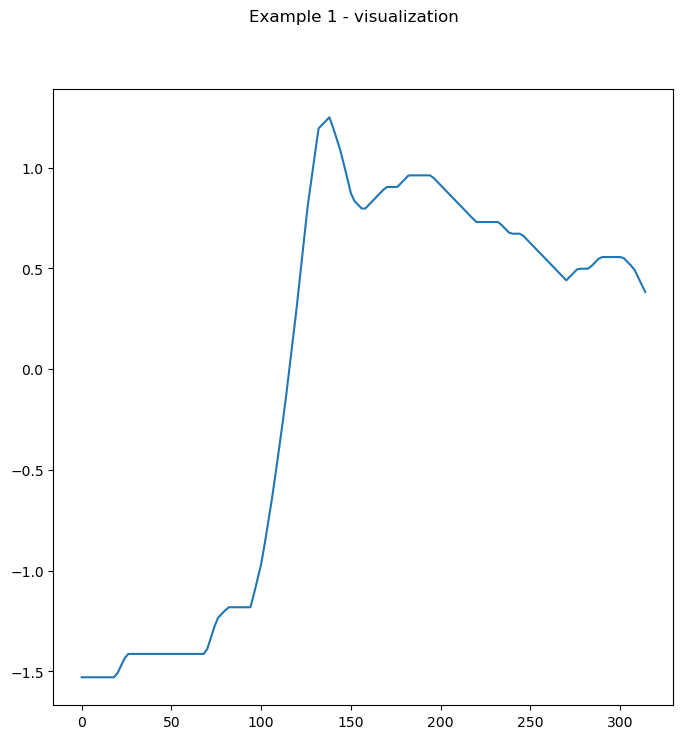

In [72]:
# Initialisation
fig, axs = plt.subplots(1, 1, figsize=(8, 8))
fig.suptitle("Example 1 - visualization")

# Plot
axs.plot(X_exploded.iloc[0].to_numpy())

<hr>
<div style="display: flex;">
    <div style="margin: 10px;"><strong><a href="./I-Introduction.ipynb">previous</a></strong></div>
    <div style="margin: 10px;"><strong><a href="./III-CORPS.ipynb">next</a></strong></div>
</div>